In [23]:
from astropy.table import Table

% matplotlib inline

In [3]:
# Check the plotting codes to make sure all of the contours are in the right place:

y_test = np.random.randn(1000)/20 + 0.9
x_test = np.random.randn(1000)/20 + 1.25

sample = np.array([x_test,y_test]).T

for s in enumerate([sample]):
    
    s1=s[1]
    
    u_r = sample[:,0]
    r_z = sample[:,1]
    
    extent = [xmin,xmax,ymin,ymax]
    
    H,xedges,yedges = np.histogram2d(u_r,r_z,range=[[xmin,xmax],[ymin,ymax]],normed=True,bins=50)
    
    H_filter = gaussian_filter(H,sigma=1)
    
    plt.contour(H_filter.T,extent=extent,colors=clr[s[0]],levels=np.linspace(2,8,4))
    plt.hist2d(u_r,r_z,bins=[xedges,yedges],cmap=cmaps[s[0]],alpha=0.75)
    
plt.xlabel('$u-r$')
plt.ylabel('$r-z$')

NameError: name 'xmin' is not defined

In [51]:
data = fits.getdata('../../fits/volume_limited_sample.fits',1)
data = Table(data)

features = data['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.5
edge = data['t02_edgeon_a05_no_debiased'] > 0.5
spiral = data['t04_spiral_a08_spiral_debiased'] > 0.5

N = (data['t04_spiral_a08_spiral_count']-data['t11_arms_number_a37_cant_tell_count'] >= 5)

In [60]:
def plot_fractions(N_select=True,s='--'):

    z_bins = np.arange(0.03,0.085,0.005)
    z_values = np.array([z_bins[m] + (z_bins[m+1] - z_bins[m])/2 for m in range(len(z_bins)-1)])

    f_array = np.zeros(len(z_bins)-1)
    e_array = np.zeros(len(z_bins)-1)
    s_array = np.zeros(len(z_bins)-1)

    for z in enumerate(z_bins[:-1]):
        
        z_select = (data['REDSHIFT_1'] >= z_bins[z[0]]) & (data['REDSHIFT_1'] < z_bins[z[0]+1])
        
        if N_select == True:
            data_f = (z_select) & (features) & (N)
            data_e = (z_select) & (features) & (edge) & (N)
            data_s = (z_select) & (features) & (edge) & (spiral) & (N)
            
        else:
            data_f = (z_select) & (features)
            data_e = (z_select) & (features) & (edge)
            data_s = (z_select) & (features) & (edge) & (spiral)
            
        f_f = np.sum(data_f)/np.sum(z_select)
        f_e = np.sum(data_e)/np.sum(z_select)
        f_s = np.sum(data_s)/np.sum(z_select)
    
        f_array[z[0]] = f_f
        e_array[z[0]] = f_e
        s_array[z[0]] = f_s
    
    plt.plot(z_values,f_array,s,label='features',color='b',linewidth=2)
    plt.plot(z_values,e_array,s,label='face on',color='r',linewidth=2)
    plt.plot(z_values,s_array,s,label='spiral',color='g',linewidth=2)

    plt.xlabel('z')
    plt.ylabel('f')

    plt.xlim(0.03,0.11)
    
    return None

In [70]:
def plot_raw_fractions(N_select=True,s='--'):

    z_bins = np.arange(0.03,0.085,0.005)
    z_values = np.array([z_bins[m] + (z_bins[m+1] - z_bins[m])/2 for m in range(len(z_bins)-1)])

    f_array = np.zeros(len(z_bins)-1)
    e_array = np.zeros(len(z_bins)-1)
    s_array = np.zeros(len(z_bins)-1)

    for z in enumerate(z_bins[:-1]):
        
        z_select = (data['REDSHIFT_1'] >= z_bins[z[0]]) & (data['REDSHIFT_1'] < z_bins[z[0]+1])
        
        if N_select == True:
            data_sel = data[(z_select) & (N)]
        else:
            data_sel = data[z_select]
            
        f_array[z[0]] = np.mean(data_sel['t01_smooth_or_features_a02_features_or_disk_debiased'])
        e_array[z[0]] = np.mean(data_sel['t02_edgeon_a05_no_debiased'])
        s_array[z[0]] = np.mean(data_sel['t04_spiral_a08_spiral_debiased'])
    
    plt.plot(z_values,f_array,s,label='features',color='b',linewidth=2)
    plt.plot(z_values,e_array,s,label='face on',color='r',linewidth=2)
    plt.plot(z_values,s_array,s,label='spiral',color='g',linewidth=2)

    plt.xlabel('z')
    plt.ylabel('f')

    plt.xlim(0.03,0.1)
    
    return None

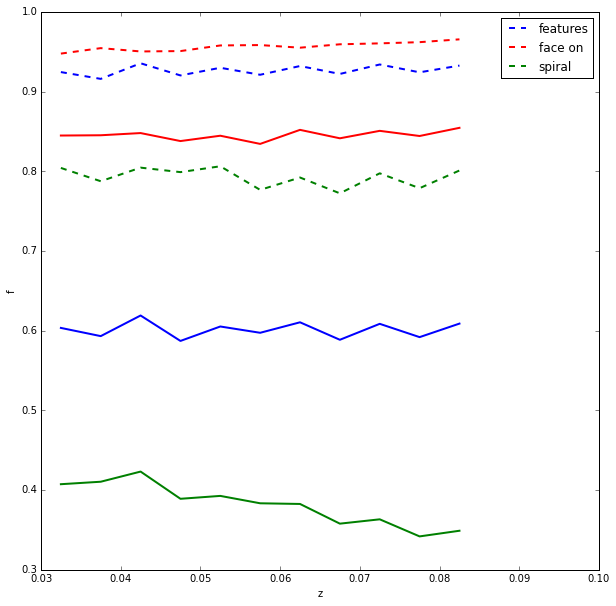

In [71]:
plt.figure(figsize=(10,10))

plot_raw_fractions()
plot_raw_fractions(N_select=False,s='-')

plt.legend(['features','face on','spiral'])

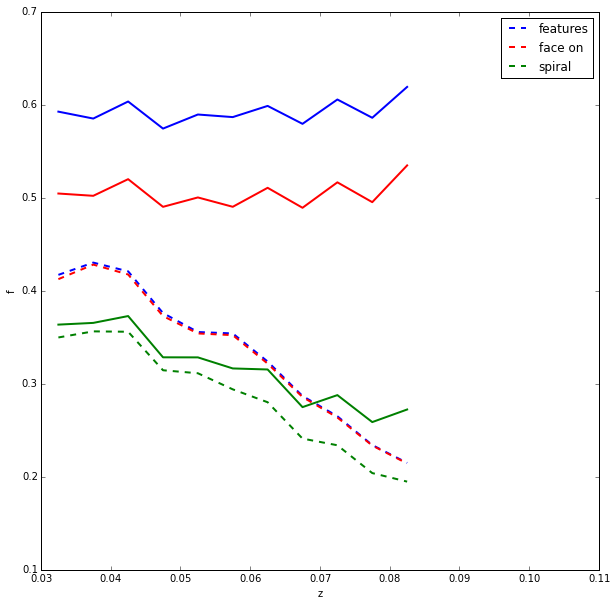

In [65]:
plt.figure(figsize=(10,10))

plot_fractions()
plot_fractions(N_select=False,s='-')

plt.legend(['features','face on','spiral'])